In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
import operator
import datetime
import matplotlib.pyplot as plt
import pylab
from scipy import stats

In [2]:
# Reading the rainfall data file
rainfallCSV = pd.read_csv('IDCJAC0009_086232_1800_Data.csv')

# Reading the tempature data file
temperatureCSV = pd.read_csv('IDCJAC0010_086038_1800_Data.csv')

# Reading the pedestrian volume data file
pedestrianCSV = pd.read_csv('Pedestrian_volume__updated_monthly_.csv')

In [3]:
# Fetching the temperatures from year 2010 and on wards
rainfallData = rainfallCSV[(rainfallCSV.Year > 2009)]

# Fetching the temperatures from year 2010 and on wards
temperatureData = temperatureCSV[(temperatureCSV.Year > 2009)]

In [4]:
# Inserting the the relevant data into a dictionary
rainfallDict = {}
for index, row in rainfallData.iterrows():
    rainfallDict[str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day'])] = row['Rainfall_amount']
    
# Inserting the maximum temperatures into a dictionary
temperatureDict = {}
for index, row in temperatureData.iterrows():
    temperatureDict[str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day'])] = row['Maximum_temperature']

In [5]:
# Defining months and creating dictionary
Months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "October", "December"]

In [6]:
# Suming up hourly visitors for each day
pedestrianDict = {}

for year in range(2009,2018):
    for month in Months:
        for date in range(1,31):
            currentDay = pedestrianCSV[(pedestrianCSV.Year == year) & (pedestrianCSV.Month == month) & (pedestrianCSV.Mdate == date)]
            numberOfVisits = sum(currentDay.Hourly_Counts)
            pedestrianDict[str(year) + "-" + str(Months.index(month)+1) + "-" + str(date)] = numberOfVisits
            
# Removing days that have 0 visitors (Not all month have 31 days)
for k, v in pedestrianDict.items():
    if v == 0:
        del pedestrianDict[k]

In [7]:
# Removing any pedestrian date that isnt in the rainfall dictionary
for date in pedestrianDict.keys():
    if date not in rainfallDict:
        del pedestrianDict[date]

# Removing any rainfall date that isnt in the pedestrian dictionary
for date in rainfallDict.keys():
    if date not in pedestrianDict:
        del rainfallDict[date]
        
# Removing any tempature date that isnt in the pedestrian dictionary
for date in temperatureDict.keys():
    if date not in pedestrianDict:
        del temperatureDict[date]

In [8]:
# Sorting the dictionary by values (Rainfall amount)
orderedRainfallDict = OrderedDict(sorted(rainfallDict.items(), key = itemgetter(1), reverse = True))

# Sorting the dictionary by values (Maximum temperature)
orderedTemperatureDict = OrderedDict(sorted(temperatureDict.items(), key = itemgetter(1), reverse = True))

# Sorting the dictionary by values (Number of pedestrians)
orderedPedestrianDict = OrderedDict(sorted(pedestrianDict.items(), key = itemgetter(1), reverse = True))

In [9]:
print('Most rainfall: %s\nHighest temperatures: %s\nLowest temperature: %s\nMost pedestrians: %s\nFewest pedestrians: %s' % (orderedRainfallDict.items()[0:4], orderedTemperatureDict.items()[0:4], orderedTemperatureDict.items()[-5:-1], orderedPedestrianDict.items()[0:4], orderedPedestrianDict.items()[-5:-1]))

Most rainfall: [('2017-2-6', 38.4), ('2014-11-16', 37.2), ('2015-2-14', 20.8), ('2014-4-10', 19.2)]
Highest temperatures: [('2014-1-17', 43.9), ('2016-1-13', 43.8), ('2015-12-19', 43.7), ('2014-1-16', 43.5)]
Lowest temperature: [('2015-7-15', 9.7), ('2012-8-8', 9.7), ('2010-6-29', 9.7), ('2015-7-14', 9.5)]
Most pedestrians: [('2016-11-14', 1427646), ('2016-11-28', 1368312), ('2016-11-6', 1322030), ('2016-11-7', 1303656)]
Fewest pedestrians: [('2011-1-30', 133229), ('2011-10-1', 132780), ('2012-1-2', 131457), ('2010-12-25', 109545)]


In [10]:
# Sorting the dictionaries by date
rainfallDateDict = OrderedDict(sorted(rainfallDict.items(), key = itemgetter(0), reverse = True))
temperatureDateDict = OrderedDict(sorted(temperatureDict.items(), key = itemgetter(0), reverse = True))
pedestrianDateDict = OrderedDict(sorted(pedestrianDict.items(), key = itemgetter(0), reverse = True))

In [11]:
# Checking for correlation between pedestrians and tempatures
cor = np.corrcoef(pedestrianDateDict.values(),temperatureDateDict.values())[0][1]
print ('correlation between number of pedestrians and temperatures is %s' % round(cor,4))

correlation between number of pedestrians and temperatures is 0.0866


In [12]:
# Seperating the week into days
def getDays(data, days):
    for k, v in data.items():
        date = k.split("-")
        dayOfWeek = datetime.date(int(date[0]), int(date[1]), int(date[2])).weekday()
        if dayOfWeek == 0:
            days[0][k] = v
        if dayOfWeek == 1:
            days[1][k] = v
        if dayOfWeek == 2:
            days[2][k] = v
        if dayOfWeek == 3:
            days[3][k] = v
        if dayOfWeek == 4:
            days[4][k] = v
        if dayOfWeek == 5:
            days[5][k] = v
            days[7][k] = v
        if dayOfWeek == 6:
            days[6][k] = v
            days[7][k] = v
    return days

In [13]:
# Defining dictionary names and inserting them to lists
mondayTemperature, tuesdayTemperature, wednesdayTemperature, thursdayTemperature, fridayTemperature, saturdayTemperature, sundayTemperature, weekendTemperature = ({} for i in range(8))
mondayPedestrian, tuesdayPedestrian, wednesdayPedestrian, thursdayPedestrian, fridayPedestrian, saturdayPedestrian, sundayPedestrian, weekendPedestrian = ({} for i in range(8))

temperatureDays = [mondayTemperature, tuesdayTemperature, wednesdayTemperature, thursdayTemperature, fridayTemperature, saturdayTemperature, sundayTemperature, weekendTemperature]
pedestrianDays = [mondayPedestrian, tuesdayPedestrian, wednesdayPedestrian, thursdayPedestrian, fridayPedestrian, saturdayPedestrian, sundayPedestrian, weekendPedestrian]

In [14]:
# Saving all the days
temperatureDays = getDays(temperatureDict, temperatureDays)
pedestrianDays = getDays(pedestrianDict, pedestrianDays)

In [15]:
def sortByDate(data):
    return OrderedDict(sorted(data.items(), key = itemgetter(0), reverse = True))

In [16]:
# Sorts all the data by date
orderedTempDays = []
orderedPedDays = []

for x in temperatureDays:
    orderedTempDays.append(sortByDate(x))

for x in pedestrianDays:
    orderedPedDays.append(sortByDate(x))

In [17]:
# Checking correlations for all of the days
correlations = []

for day in range(0,8):
    correlations.append(np.corrcoef(orderedPedDays[day].values(),orderedTempDays[day].values())[0][1])

In [18]:
print ('Correlations between pedestrians and temperatures \nMonday: %s\nTuesday: %s\nWednesday: %s\nThursday: %s\nFriday: %s\nSaturday: %s\nSunday: %s\nWeekend: %s' % (round(correlations[0],4),round(correlations[1],4),round(correlations[2],4),round(correlations[3],4),round(correlations[4],4),round(correlations[5],4),round(correlations[6],4),round(correlations[7],4)))

Correlations between pedestrians and temperatures 
Monday: 0.1446
Tuesday: 0.0938
Wednesday: 0.1175
Thursday: 0.0682
Friday: -0.0027
Saturday: 0.0402
Sunday: 0.175
Weekend: 0.1058


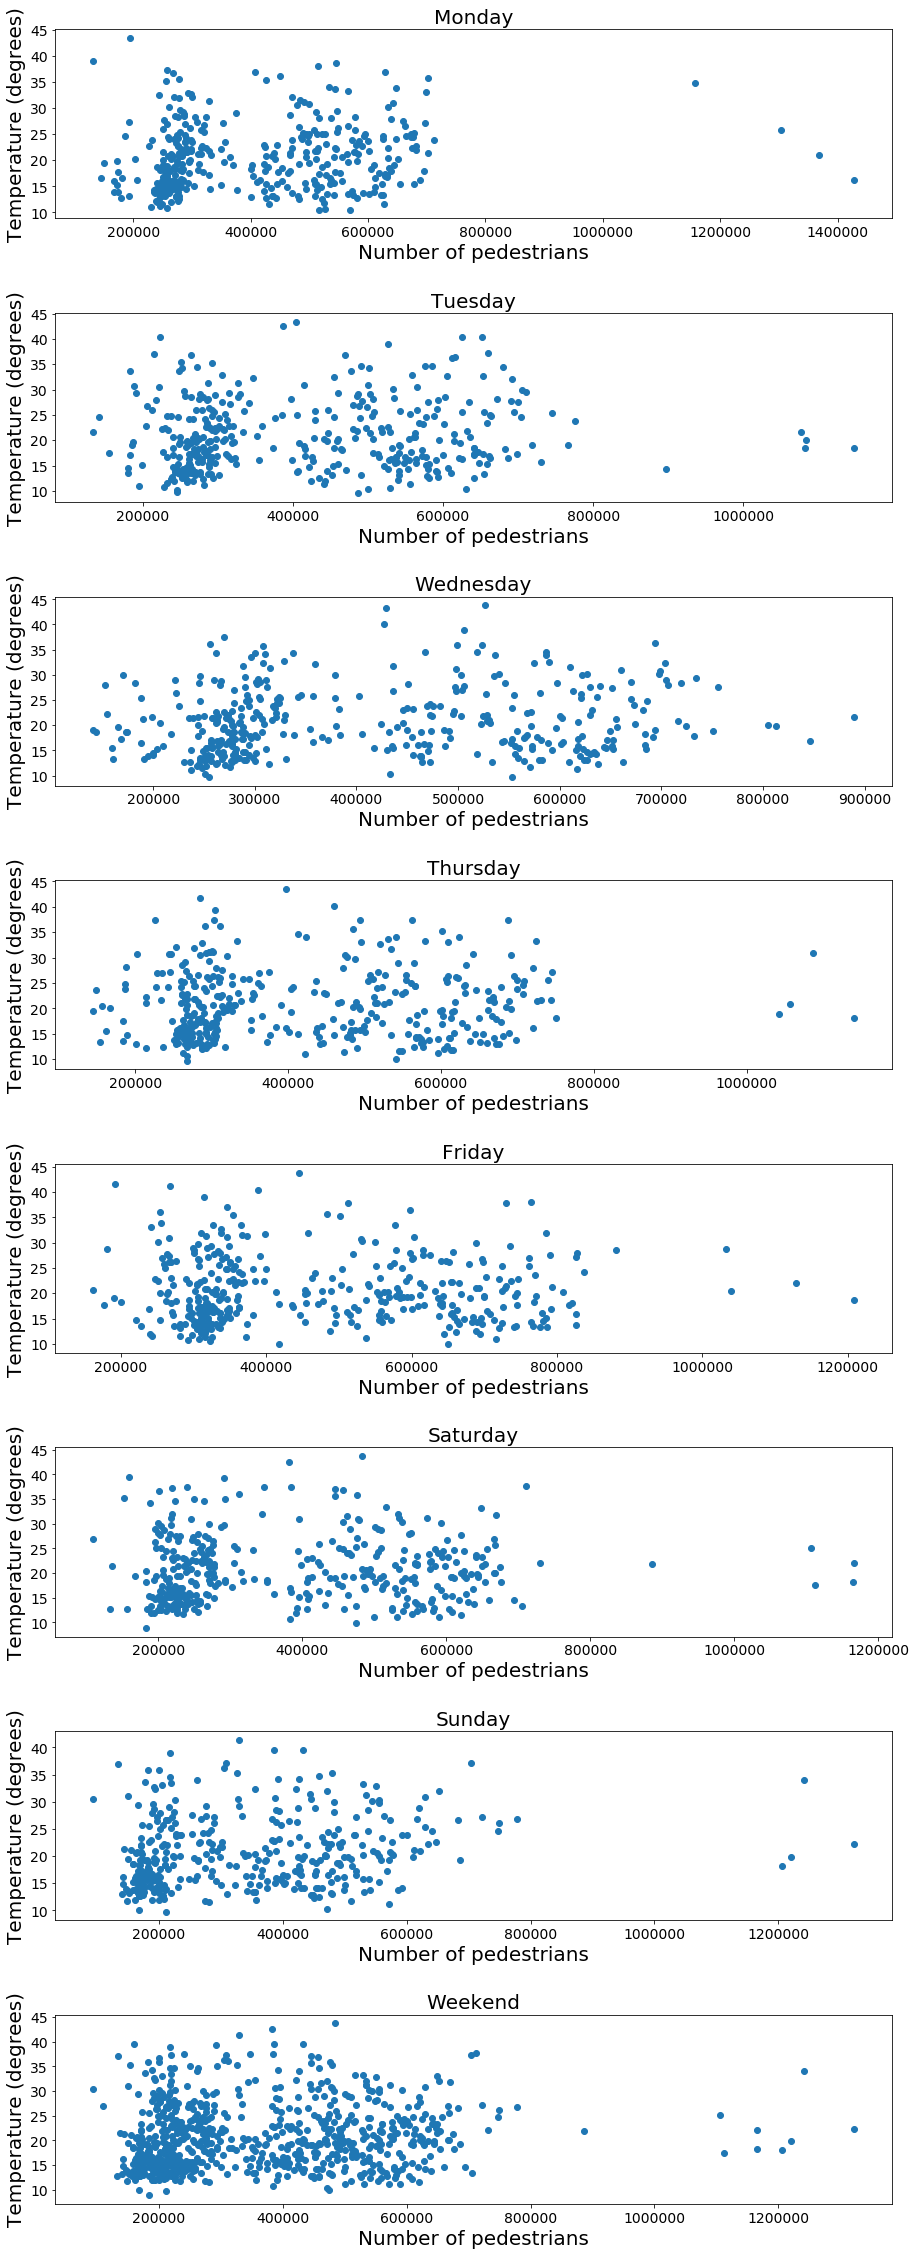

In [19]:
# Making a scatterplot for each day
fig = plt.figure(figsize=(15,40))
ax = fig.add_subplot(8,1,1)
fig.subplots_adjust(hspace = 0.5)

plt.scatter(orderedPedDays[0].values(),orderedTempDays[0].values())
plt.title('Monday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,2)
plt.scatter(orderedPedDays[1].values(),orderedTempDays[1].values())
plt.title('Tuesday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,3)
plt.scatter(orderedPedDays[2].values(),orderedTempDays[2].values())
plt.title('Wednesday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,4)
plt.scatter(orderedPedDays[3].values(),orderedTempDays[3].values())
plt.title('Thursday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,5)
plt.scatter(orderedPedDays[4].values(),orderedTempDays[4].values())
plt.title('Friday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,6)
plt.scatter(orderedPedDays[5].values(),orderedTempDays[5].values())
plt.title('Saturday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,7)
plt.scatter(orderedPedDays[6].values(),orderedTempDays[6].values())
plt.title('Sunday',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(8,1,8)
plt.scatter(orderedPedDays[7].values(),orderedTempDays[7].values())
plt.title('Weekend',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [20]:
# Sorting the data by seasons
def getSeasons(dictionary):
    
    #Defining the four seasons
    summerN = ['12', '1', '2']
    autumnN = ['3', '4', '5']
    winterN = ['6', '7', '8']
    springN = ['9', '10', '11']

    summer = {}
    autumn = {}
    winter = {}
    spring = {}
    
    for k, v in dictionary.items():
        date = k.split('-')
        if date[1] in summerN:
            summer[k] = v
        if date[1] in autumnN:
            autumn[k] = v
        if date[1] in winterN:
            winter[k] = v
        if date[1] in springN:
            spring[k] = v
    
    summer = OrderedDict(sorted(summer.items(), key = itemgetter(0), reverse = True))
    autumn = OrderedDict(sorted(autumn.items(), key = itemgetter(0), reverse = True))
    winter = OrderedDict(sorted(winter.items(), key = itemgetter(0), reverse = True))
    spring = OrderedDict(sorted(spring.items(), key = itemgetter(0), reverse = True))
    
    return [summer,autumn,winter,spring]

In [21]:
pedestrianSeasons = getSeasons(pedestrianDict)
temperatureSeasons = getSeasons(temperatureDict)

summer = np.corrcoef(pedestrianSeasons[0].values(),temperatureSeasons[0].values())[0][1]
autumn = np.corrcoef(pedestrianSeasons[1].values(),temperatureSeasons[1].values())[0][1]
winter = np.corrcoef(pedestrianSeasons[2].values(),temperatureSeasons[2].values())[0][1]
spring = np.corrcoef(pedestrianSeasons[3].values(),temperatureSeasons[3].values())[0][1]

print ("Correlations between pedestrians and temperatures\nSummer: %s\nAutumn: %s\nWinter: %s\nSpring: %s" %(round(summer,4),round(autumn,4),round(winter,4),round(spring,4)))

Correlations between pedestrians and temperatures
Summer: -0.0105
Autumn: 0.1598
Winter: -0.0256
Spring: 0.0529


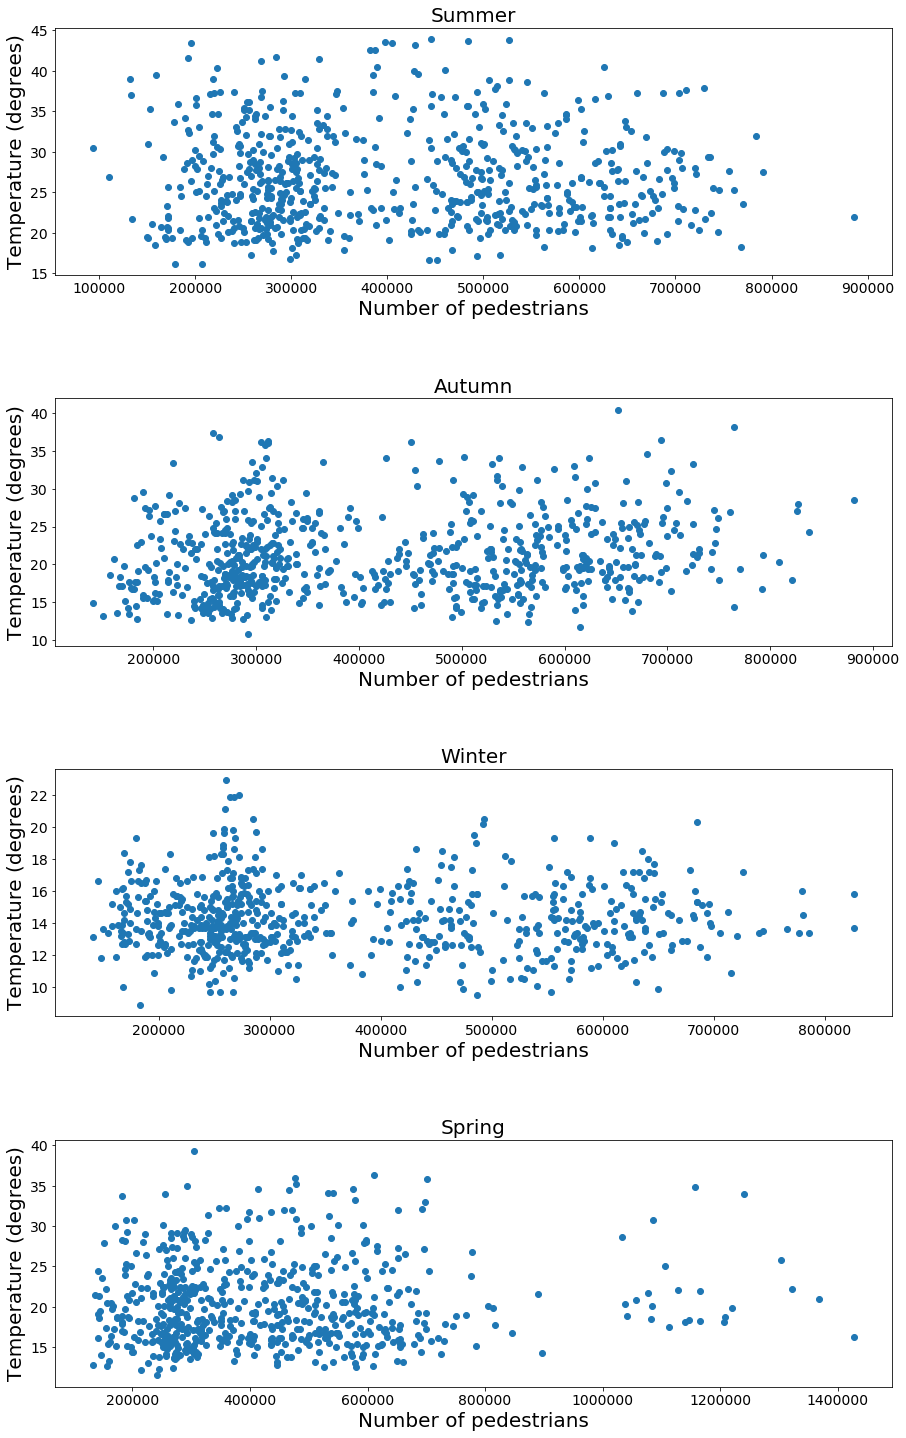

In [22]:
# Making a scatterplot for each season
fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(4,1,1)
fig.subplots_adjust(hspace = 0.5)

plt.scatter(pedestrianSeasons[0].values(),temperatureSeasons[0].values())
plt.title('Summer',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(4,1,2)
plt.scatter(pedestrianSeasons[1].values(),temperatureSeasons[1].values())
plt.title('Autumn',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(4,1,3)
plt.scatter(pedestrianSeasons[2].values(),temperatureSeasons[2].values())
plt.title('Winter',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax = fig.add_subplot(4,1,4)
plt.scatter(pedestrianSeasons[3].values(),temperatureSeasons[3].values())
plt.title('Spring',fontsize = 20)
plt.ylabel('Temperature (degrees)',fontsize = 20)
plt.xlabel('Number of pedestrians',fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [23]:
# Sorting the pedestrian csv file by Sensor_ID: Hourly_Counts
sensorNumbs = {}
for index, row in pedestrianCSV.iterrows():
    if str(row['Sensor_ID']) in sensorNumbs:
        # append the new number to the existing array at this slot
        sensorNumbs[str(row['Sensor_ID'])].append(row['Hourly_Counts'])
    else:
        # create a new array in this slot
        sensorNumbs[str(row['Sensor_ID'])] = [row['Hourly_Counts']]

In [24]:
# Calculating the avg number of Hourly_Counts for each sensor
avgSensorNumb = {}
for key, val in sensorNumbs.items():
    avgSensorNumb[key] = sum(val)/len(val)